In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2: Load the dataset
data = pd.read_csv('50_Startups.csv')  # Replace 'company_data.csv' with your dataset filename

In [ ]:
# Step 3: Explore and preprocess the data
# Assuming the dataset has columns named 'R&D Spend', 'Administration Cost', 'Marketing Spend', and 'Profit'
features = data[['R&D Spend', 'Administration', 'Marketing Spend']]
target = data['Profit']

In [ ]:
#step -4
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [ ]:
# Step 5: Train and evaluate different regression algorithms
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Support Vector Regression': SVR()
}

results = {}

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    results[model_name] = {
        'MSE': mse,
        'RMSE': rmse,
        'MAE': mae,
        'R^2': r2
    }

In [ ]:
# Step 6: Choose the best model
best_model = min(results, key=lambda x: results[x]['RMSE'])


In [ ]:
# Step 8: Use the best model for predictions
# Assuming you have new data for prediction
new_data = pd.DataFrame([[100000, 50000, 200000]], columns=['R&D Spend', 'Administration', 'Marketing Spend'])
predicted_profit = models[best_model].predict(new_data)
print("Predicted Profit:", predicted_profit)

Predicted Profit: [137301.65378844]


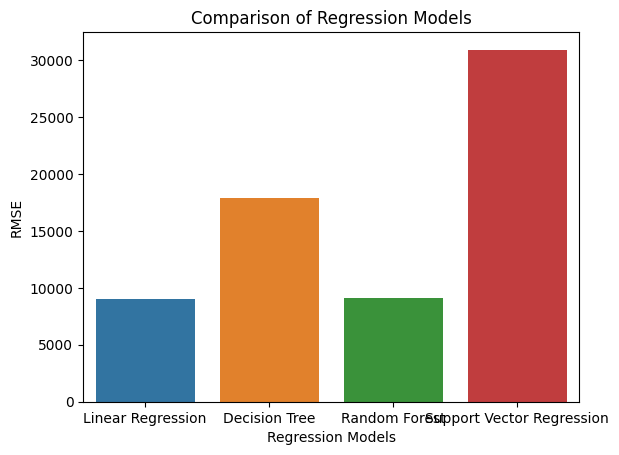

In [ ]:
# Step 9: Data visualization (optional)
sns.barplot(x=list(results.keys()), y=[results[model]['RMSE'] for model in results.keys()])
plt.xlabel('Regression Models')
plt.ylabel('RMSE')
plt.title('Comparison of Regression Models')
plt.show()